<a href="https://colab.research.google.com/github/keanfdes30/SHALA2020/blob/master/Assignment_ML_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [ ]:
housing_data = california_housing.fetch_california_housing()

In [ ]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [ ]:
df = df[df.Target < 5]

In [ ]:
X = df.MedInc
y = df.Target

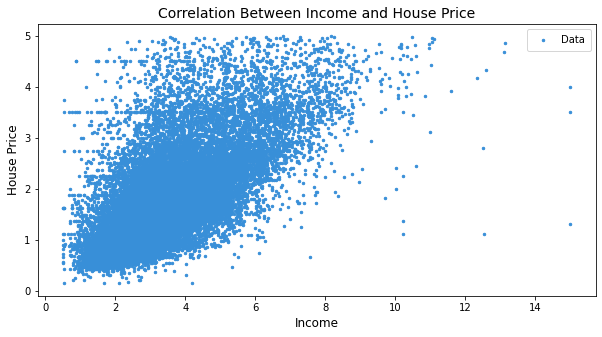

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [ ]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  m, b = 0.1, 0.1
  mse = []
  X = np.array(X)
  y = np.array(y)
  for i in range(epochs):
    N = batch_size
    index = random.randint(0, len(X) - 1)
    # Updating m and b
    f = y[index] - (m*X[index] + b)
    m -= lr * (-2 * np.sum(np.dot(X[index], f)) / N)
    b -= lr * (-2 * f.sum() / N)
    mse.append(mean_squared_error(y, (m*X + b)))        
        
  return m, b, mse

In [ ]:
from sklearn import metrics
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)
y_pred = m*X+b
print(metrics.mean_squared_error(y_pred,y))

0.6650108895259459


Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

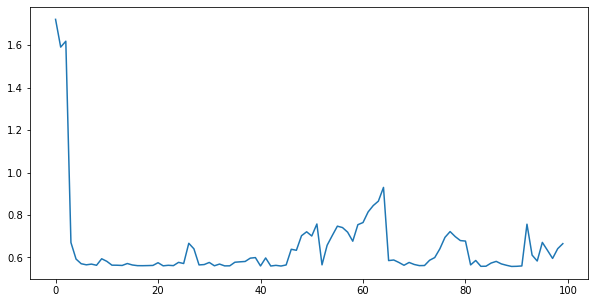

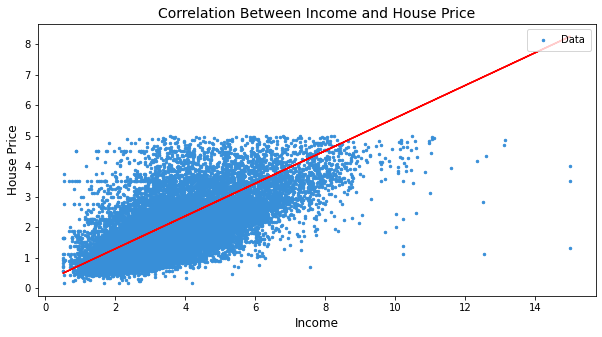

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(np.arange(0,100),mse)

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X,y_pred,color='r')
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)

#**SVM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [ ]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



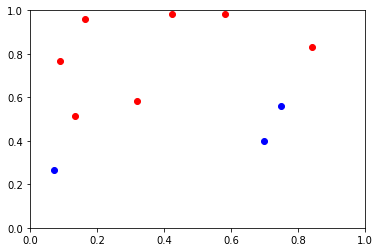

In [ ]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [ ]:
def svm_function(x, y, epoch, l_rate):
  x = np.append(x,np.ones((len(x),1)),axis = 1)
  w = np.zeros(len(x[0]))
  for i in range(epoch):
    index  = random.randint(0,len(x)-1)
    check = y[index] * np.dot(x[index], w)
    nu = 1/((i+1)*l_rate)
    if check < 1:
      w = (1 - nu * l_rate) * w + (x[index] * y[index])/(nu)
    else:
      w = (1 - nu * l_rate) * w 
  return w



---


**Run SVM Classifier**


---



In [ ]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)
print(w)

[-82.44646749 208.00762227 -64.6529    ]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



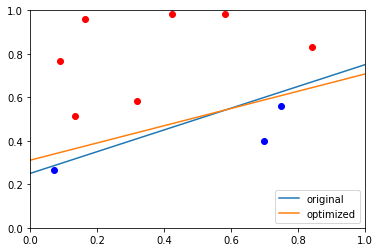

In [ ]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

r = np.linspace(0,10)
plt.plot(r,0.5*r+0.25)
plt.plot()

a =-w[0]/w[1]
b = -w[2]/w[1]
plt.plot(r, a*r + b)
plt.legend(['original','optimized'], loc = 'lower right')